<a href="https://colab.research.google.com/github/abhinay-2006/SML/blob/main/SML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
df = pd.read_csv('/content/archive (1).zip', delimiter=';')
print(df.head())

         Date      Time CO(GT)  PT08.S1(CO)  NMHC(GT) C6H6(GT)  PT08.S2(NMHC)  \
0  10/03/2004  18.00.00    2,6       1360.0     150.0     11,9         1046.0   
1  10/03/2004  19.00.00      2       1292.0     112.0      9,4          955.0   
2  10/03/2004  20.00.00    2,2       1402.0      88.0      9,0          939.0   
3  10/03/2004  21.00.00    2,2       1376.0      80.0      9,2          948.0   
4  10/03/2004  22.00.00    1,6       1272.0      51.0      6,5          836.0   

   NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)     T    RH  \
0    166.0        1056.0    113.0        1692.0       1268.0  13,6  48,9   
1    103.0        1174.0     92.0        1559.0        972.0  13,3  47,7   
2    131.0        1140.0    114.0        1555.0       1074.0  11,9  54,0   
3    172.0        1092.0    122.0        1584.0       1203.0  11,0  60,0   
4    131.0        1205.0    116.0        1490.0       1110.0  11,2  59,6   

       AH  Unnamed: 15  Unnamed: 16  
0  0,7578         

In [ ]:
X = df.drop(columns=['CO(GT)'])
y = df['CO(GT)']
print("Feature vector shape:", X.shape)
print("Target vector shape:", y.shape)

Feature vector shape: (9471, 16)
Target vector shape: (9471,)


In [ ]:
df.isnull().sum()

,0
Date,114
Time,114
CO(GT),114
PT08.S1(CO),114
NMHC(GT),114
C6H6(GT),114
PT08.S2(NMHC),114
NOx(GT),114
PT08.S3(NOx),114
NO2(GT),114


In [ ]:
df.dropna(axis=0, inplace=True)

In [ ]:
X = df.drop(columns=['CO(GT)'])
y = df['CO(GT)']
print("Features (X):")
print(X.head())
print("\nTarget (y):")
print(y.head())


Features (X):
Empty DataFrame
Columns: [Date, Time, PT08.S1(CO), NMHC(GT), C6H6(GT), PT08.S2(NMHC), NOx(GT), PT08.S3(NOx), NO2(GT), PT08.S4(NO2), PT08.S5(O3), T, RH, AH, Unnamed: 15, Unnamed: 16]
Index: []

Target (y):
Series([], Name: CO(GT), dtype: object)


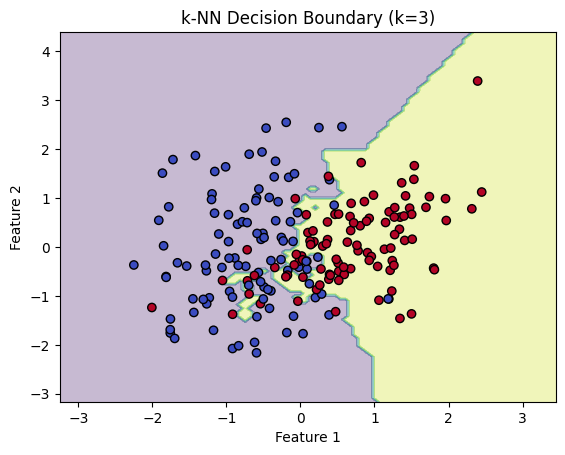

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2, n_clusters_per_class=1, n_samples=200, random_state=42)
scaler = StandardScaler()
X = scaler.fit_transform(X)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X, y)
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),np.linspace(y_min, y_max, 100))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=plt.cm.coolwarm)
plt.title("k-NN Decision Boundary (k=3)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,n_clusters_per_class=1, n_samples=200, random_state=42)
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
accuracy = knn.score(X_test, y_test)
print(f"Accuracy of k-NN: {accuracy:.2f}")
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)


Accuracy of k-NN: 0.85


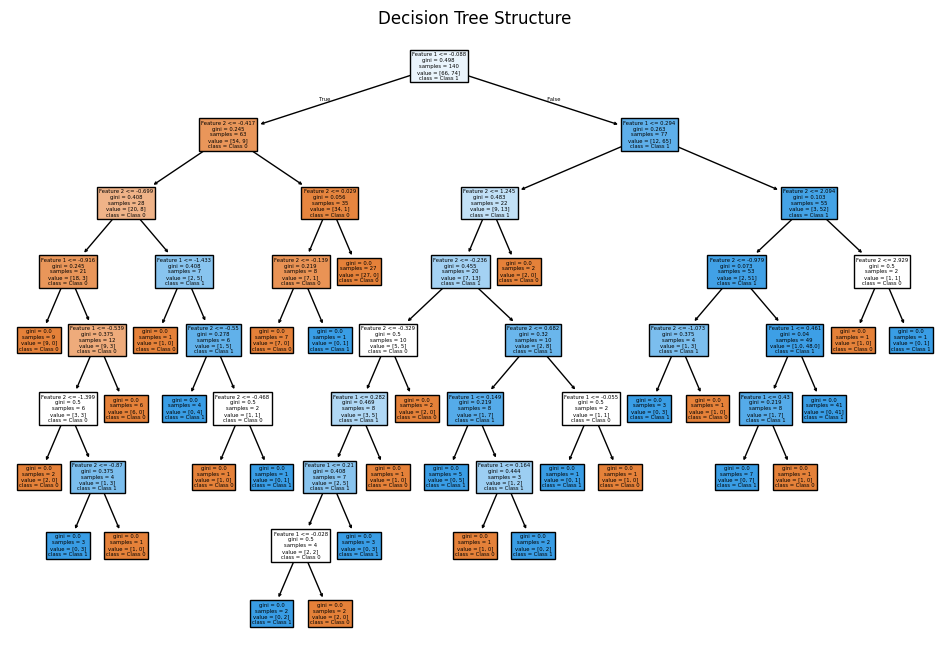

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,n_clusters_per_class=1, n_samples=200, random_state=42)
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
plt.figure(figsize=(12, 8))
plot_tree(dt, filled=True, feature_names=["Feature 1", "Feature 2"], class_names=["Class 0", "Class 1"])
plt.title("Decision Tree Structure")
plt.show()


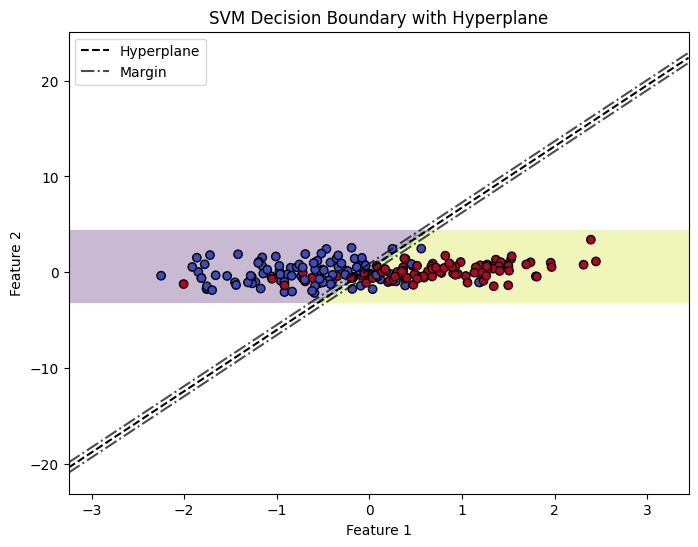

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,n_clusters_per_class=1, n_samples=200, random_state=42)
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train, y_train)
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=plt.cm.coolwarm)
w = svm.coef_[0]
b = svm.intercept_[0]
x_hyperplane = np.linspace(x_min, x_max, 100)
y_hyperplane = -(w[0] / w[1]) * x_hyperplane - b / w[1]
plt.plot(x_hyperplane, y_hyperplane, 'k--', label='Hyperplane')
margin = 1 / np.sqrt(np.sum(svm.coef_ ** 2))
y_margin_pos = y_hyperplane + margin
y_margin_neg = y_hyperplane - margin
plt.plot(x_hyperplane, y_margin_pos, 'k-.', alpha=0.7, label='Margin')
plt.plot(x_hyperplane, y_margin_neg, 'k-.', alpha=0.7)
plt.title("SVM Decision Boundary with Hyperplane")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,n_clusters_per_class=1, n_samples=200, random_state=42)
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train, y_train)
knn_accuracy = knn.score(X_test, y_test)
dt_accuracy = dt.score(X_test, y_test)
svm_accuracy = svm.score(X_test, y_test)
print(f"Accuracy of k-NN: {knn_accuracy:.2f}")
print(f"Accuracy of Decision Tree: {dt_accuracy:.2f}")
print(f"Accuracy of SVM: {svm_accuracy:.2f}")


Accuracy of k-NN: 0.85
Accuracy of Decision Tree: 0.85
Accuracy of SVM: 0.87


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,n_clusters_per_class=1, n_samples=200, random_state=42)
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train, y_train)
knn_preds = knn.predict(X_test)
dt_preds = dt.predict(X_test)
svm_preds = svm.predict(X_test)
def evaluate_model(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    print(f"{model_name} Confusion Matrix:\n{cm}")
    print(f"{model_name} Accuracy: {accuracy:.2f}")
    print(f"{model_name} Precision: {precision:.2f}")
    print(f"{model_name} Recall: {recall:.2f}")
    print(f"{model_name} F1 Score: {f1:.2f}\n")
evaluate_model(y_test, knn_preds, "k-NN")
evaluate_model(y_test, dt_preds, "Decision Tree")
evaluate_model(y_test, svm_preds, "SVM")


k-NN Confusion Matrix:
[[28  6]
 [ 3 23]]
k-NN Accuracy: 0.85
k-NN Precision: 0.79
k-NN Recall: 0.88
k-NN F1 Score: 0.84

Decision Tree Confusion Matrix:
[[30  4]
 [ 5 21]]
Decision Tree Accuracy: 0.85
Decision Tree Precision: 0.84
Decision Tree Recall: 0.81
Decision Tree F1 Score: 0.82

SVM Confusion Matrix:
[[28  6]
 [ 2 24]]
SVM Accuracy: 0.87
SVM Precision: 0.80
SVM Recall: 0.92
SVM F1 Score: 0.86



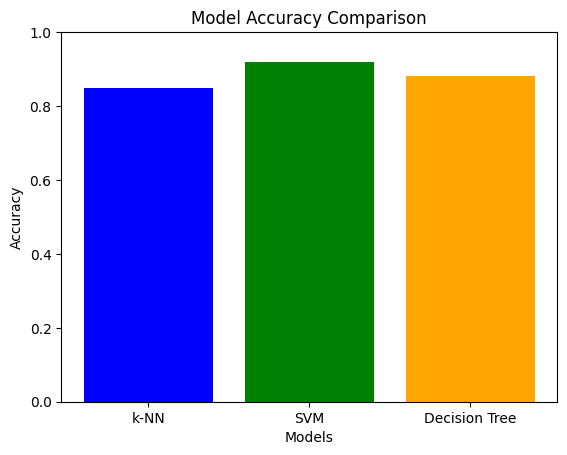

In [3]:
import matplotlib.pyplot as plt
models = ['k-NN', 'SVM', 'Decision Tree']
accuracy = [0.85, 0.92, 0.88]
plt.bar(models, accuracy, color=['blue', 'green', 'orange'])
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.xlabel('Models')
plt.ylim(0, 1)
plt.show()


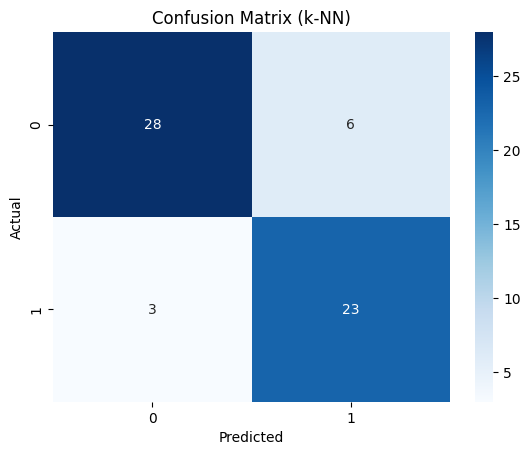

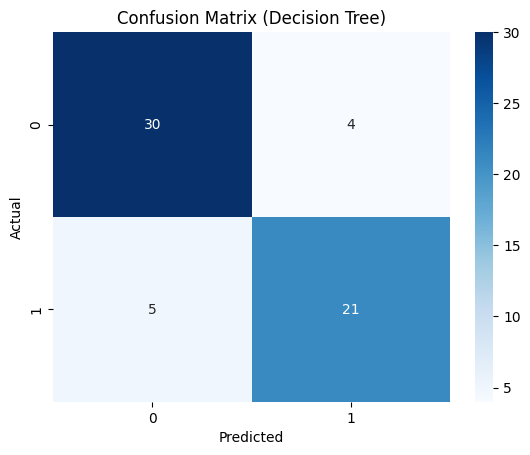

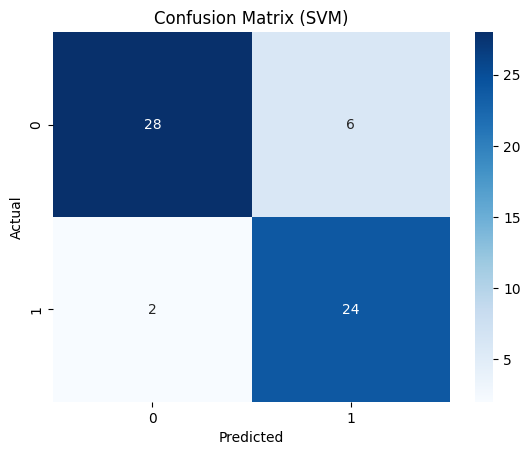

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
conf_matrix_knn = np.array([[28,6], [3,23]])
conf_matrix_svm = np.array([[28,6], [2,24]])
conf_matrix_dt = np.array([[30,4], [5,21]])
def plot_confusion_matrix(conf_matrix, model_name):
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix ({model_name})')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
plot_confusion_matrix(conf_matrix_knn, "k-NN")
plot_confusion_matrix(conf_matrix_dt, "Decision Tree")
plot_confusion_matrix(conf_matrix_svm, "SVM")

